<a href="https://colab.research.google.com/github/manuel222-design/manuel222-design/blob/main/PCA_Housing_Price_ipynbp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Importing Housing.csv
housing = pd.read_csv("/content/Principal Component Analysis.csv")

In [ ]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [ ]:
housing.shape

(545, 16)

In [ ]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    int64  
 12  semi-furnished   545 non-null    int64  
 13  unfurnished      545 non-null    int64  
 14  areaperbedroom   545 non-null    float64
 15  bbratio          545 non-null    float64
dtypes: float64(2), int64(14)
memory usage: 68.3 KB


In [ ]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [ ]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

<ipython-input-65-d30b278feeee>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


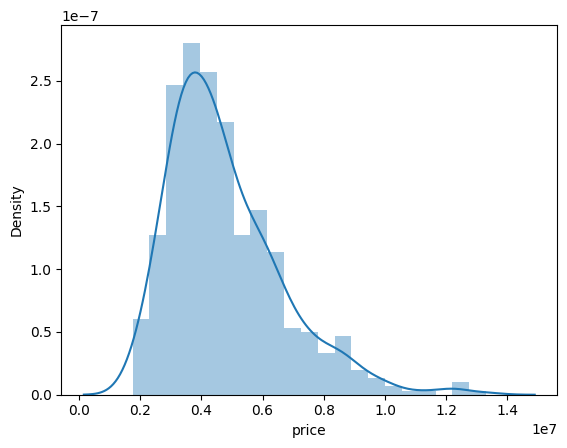

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y)
plt.show()

In [ ]:
y.skew()

np.float64(1.2122388370279804)

In [ ]:
from scipy import stats
y=stats.boxcox(y)[0]

<ipython-input-68-ddda3f7b3fdc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


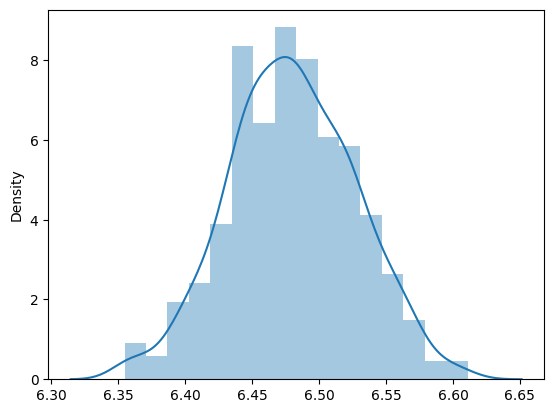

In [ ]:
sns.distplot(y)
plt.show()

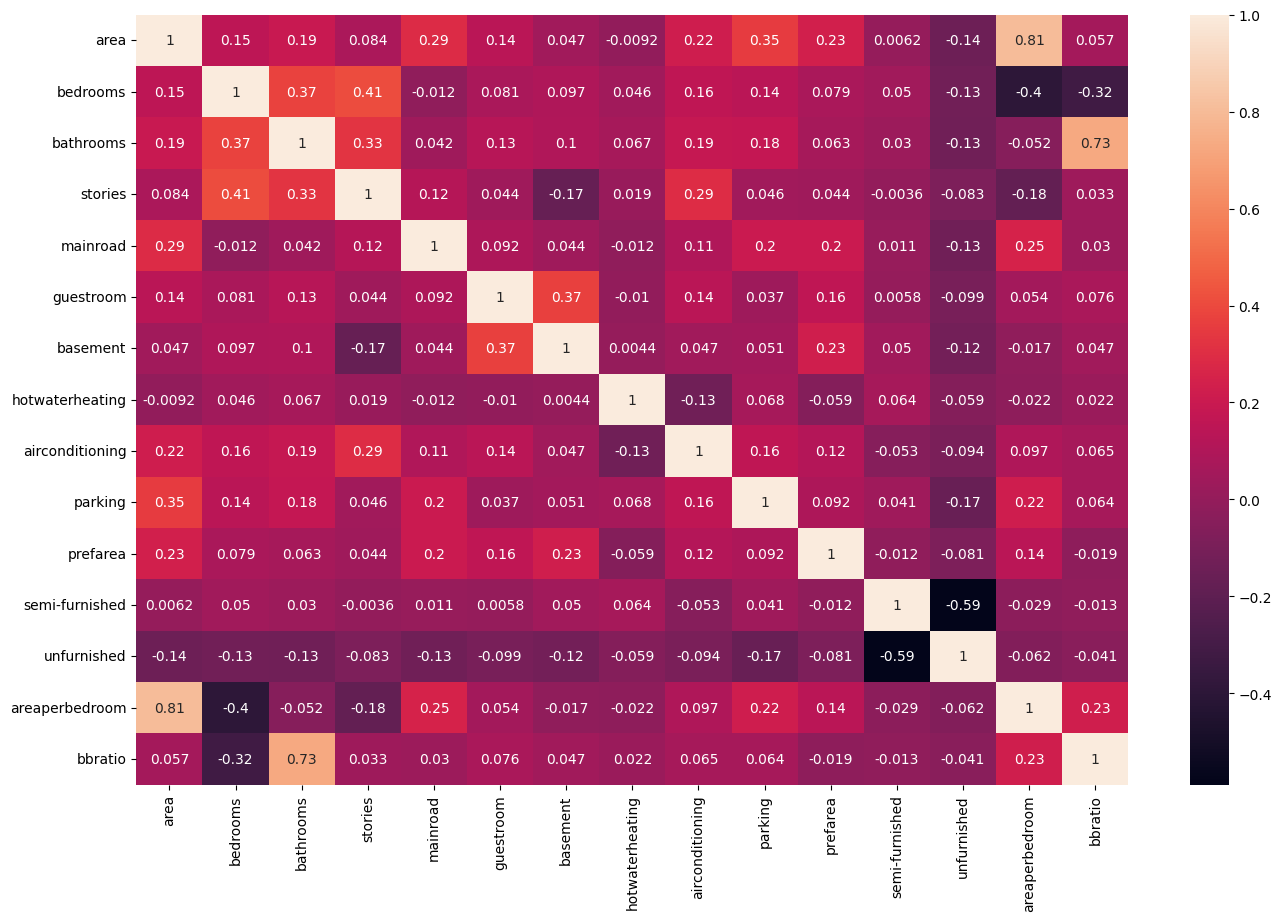

In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)
plt.show()

In [ ]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X.transpose())

In [ ]:
#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())

In [ ]:
# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)

max corr: 0.8056104195904636 , min corr:  -0.5884049771343842


In [ ]:
# Retrieve the (i,j) index for which matrix has maximum value
ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape)
print("ij_max",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

ij_max (np.int64(0), np.int64(13))
Maximum correlation : 0.8056104195904636


In [ ]:
# Retrieve the (i,j) index for which matrix has absolute minimum value
ij_min = np.unravel_index(np.absolute(corrmat).argmin(), corrmat.shape)
print("ij_min",ij_min)
print("Minimum correlation :",corrmat_diag_zero[ij_min])

ij_min (np.int64(3), np.int64(11))
Minimum correlation : -0.003648304604063477


In [ ]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

from sklearn.preprocessing import PowerTransformer

In [ ]:
X_train.shape
# We have 15 variables after splitting the data

(381, 15)

In [ ]:
scaler = PowerTransformer()
Xtrain=scaler.fit_transform(X_train)
Xtest=scaler.transform(X_test)

In [ ]:
Xtrain.shape

(381, 15)

In [ ]:
xtrain_df = pd.DataFrame(Xtrain,columns=X_train.columns)
Xtrain[:,0].max()
xtrain_df['area'].max()

2.873470816532277

In [ ]:
y_train.shape

(381,)

In [ ]:
xtest_df = pd.DataFrame(Xtest,columns=X_train.columns)
xtest_df['guestroom'].min()

-0.4661034178872047

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(Xtrain, y_train)
# Make predictions using the testing set
y_pred = regr.predict(Xtest)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.00


In [ ]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

R2 score: 0.72


In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.7207625117800271

In [ ]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA( random_state=42)

In [ ]:
#Doing the PCA on the train data
pca.fit(Xtrain)

PCA(random_state=42)

In [ ]:
components = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':X.columns })
components

,PC1,PC2,Feature
0,0.476385,-0.168827,area
1,0.113266,0.564131,bedrooms
2,0.345603,0.233689,bathrooms
3,0.137810,0.457178,stories
4,0.296363,-0.056469,mainroad
5,0.196351,0.086351,guestroom
6,0.096615,0.120499,basement
7,0.060173,0.013837,hotwaterheating
8,0.254030,0.128815,airconditioning
9,0.304426,-0.041006,parking


In [ ]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4],
                       'PC6':pca.components_[5],'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],'PC11':pca.components_[10],
                       'PC12':pca.components_[11],'PC13':pca.components_[12],
                       'PC14':pca.components_[13],'PC15':pca.components_[14],'Feature':colnames})

In [ ]:
pcs_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Feature
0,0.476385,-0.168827,-0.211973,-0.059889,-0.242990,0.081738,-0.227302,-0.087901,0.110376,-0.388316,0.082254,0.021149,-0.004049,0.046567,-0.631306,area
1,0.113266,0.564131,-0.121572,-0.091297,-0.175047,0.190874,-0.172897,0.120514,0.065958,-0.275960,0.152319,-0.278765,0.148126,0.459344,0.346364,bedrooms
2,0.345603,0.233689,0.486288,-0.202424,0.178114,0.011087,-0.008300,0.164684,0.010468,-0.221661,0.117854,-0.151800,0.112766,-0.621126,0.069063,bathrooms
3,0.137810,0.457178,0.101445,-0.191893,-0.252196,-0.047566,0.196465,-0.218859,-0.130351,-0.028418,-0.230936,0.632466,-0.318224,0.009164,0.005026,stories
4,0.296363,-0.056469,-0.181658,0.008337,-0.186595,0.112798,0.697290,-0.032961,-0.365636,0.172965,0.364940,-0.142790,0.154154,-0.005490,0.009950,mainroad
5,0.196351,0.086351,-0.214765,-0.069800,0.475852,0.180314,-0.075778,-0.453980,-0.384905,-0.015103,-0.472689,-0.215864,0.117234,0.000693,0.006967,guestroom
6,0.096615,0.120499,-0.270151,0.094557,0.579011,0.194802,-0.161091,0.114777,-0.016806,0.079589,0.527605,0.420323,-0.142261,0.001605,-0.001238,basement
7,0.060173,0.013837,0.233303,0.268260,-0.013157,0.635756,0.176573,-0.334446,0.543563,0.158225,-0.041885,0.002575,0.011616,-0.003279,0.000315,hotwaterheating
8,0.254030,0.128815,-0.068828,-0.287863,-0.025070,-0.422378,-0.187480,-0.353560,0.323473,0.567656,0.185425,-0.098122,0.144854,0.012956,0.007644,airconditioning
9,0.304426,-0.041006,0.060089,0.058928,-0.223205,0.319725,-0.339645,0.460442,-0.248662,0.530018,-0.245282,0.096331,0.083359,0.002032,0.001802,parking


In [ ]:
pca.explained_variance_

array([2.65769941, 2.18678082, 1.57976787, 1.53994779, 1.43405237,
       1.11839734, 0.88874385, 0.83121757, 0.69280095, 0.67809924,
       0.61822323, 0.42835294, 0.37164429, 0.01105935, 0.00268666])

In [ ]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [17.7 14.5 10.5 10.2  9.5  7.4  5.9  5.5  4.6  4.5  4.1  2.8  2.5  0.1
  0. ]


In [ ]:
print (pca.explained_variance_ratio_.cumsum())

[0.17671492 0.32211767 0.4271591  0.52955283 0.6249054  0.69926952
 0.7583636  0.81363266 0.85969817 0.90478613 0.94589284 0.97437475
 0.999086   0.99982136 1.        ]


In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 17.67,  32.21,  42.71,  52.95,  62.49,  69.93,  75.84,  81.37,
        85.98,  90.49,  94.6 ,  97.45,  99.92,  99.99, 100.01])

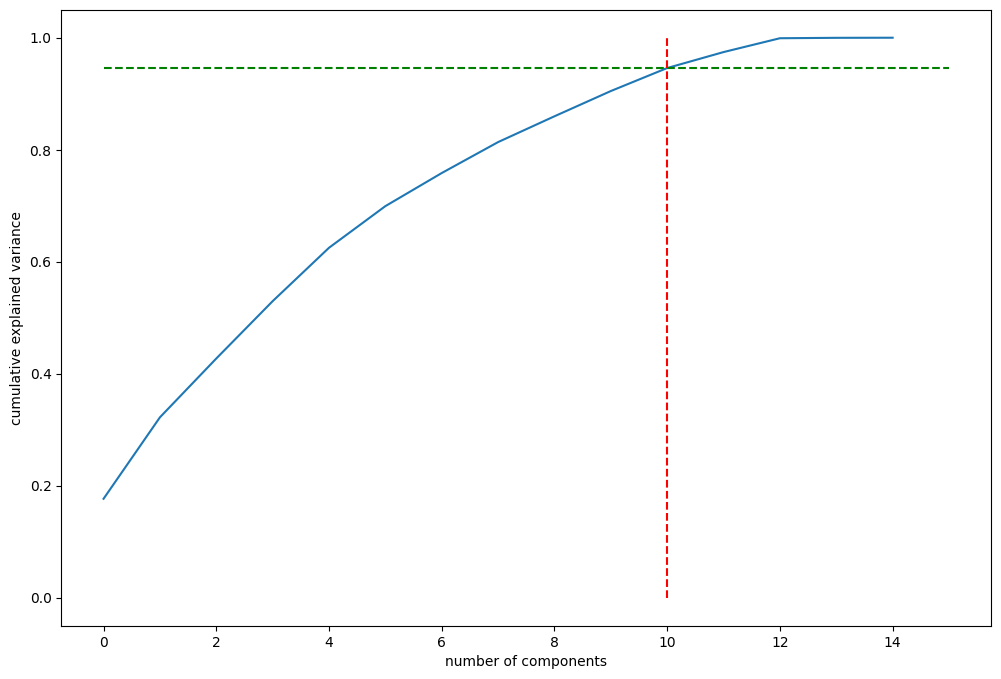

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(x=10, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=.946, xmax=15, xmin=0, colors="g", linestyles="--")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
product = np.dot(pca.components_[0],pca.components_[1])
product.round(5)

np.float64(0.0)

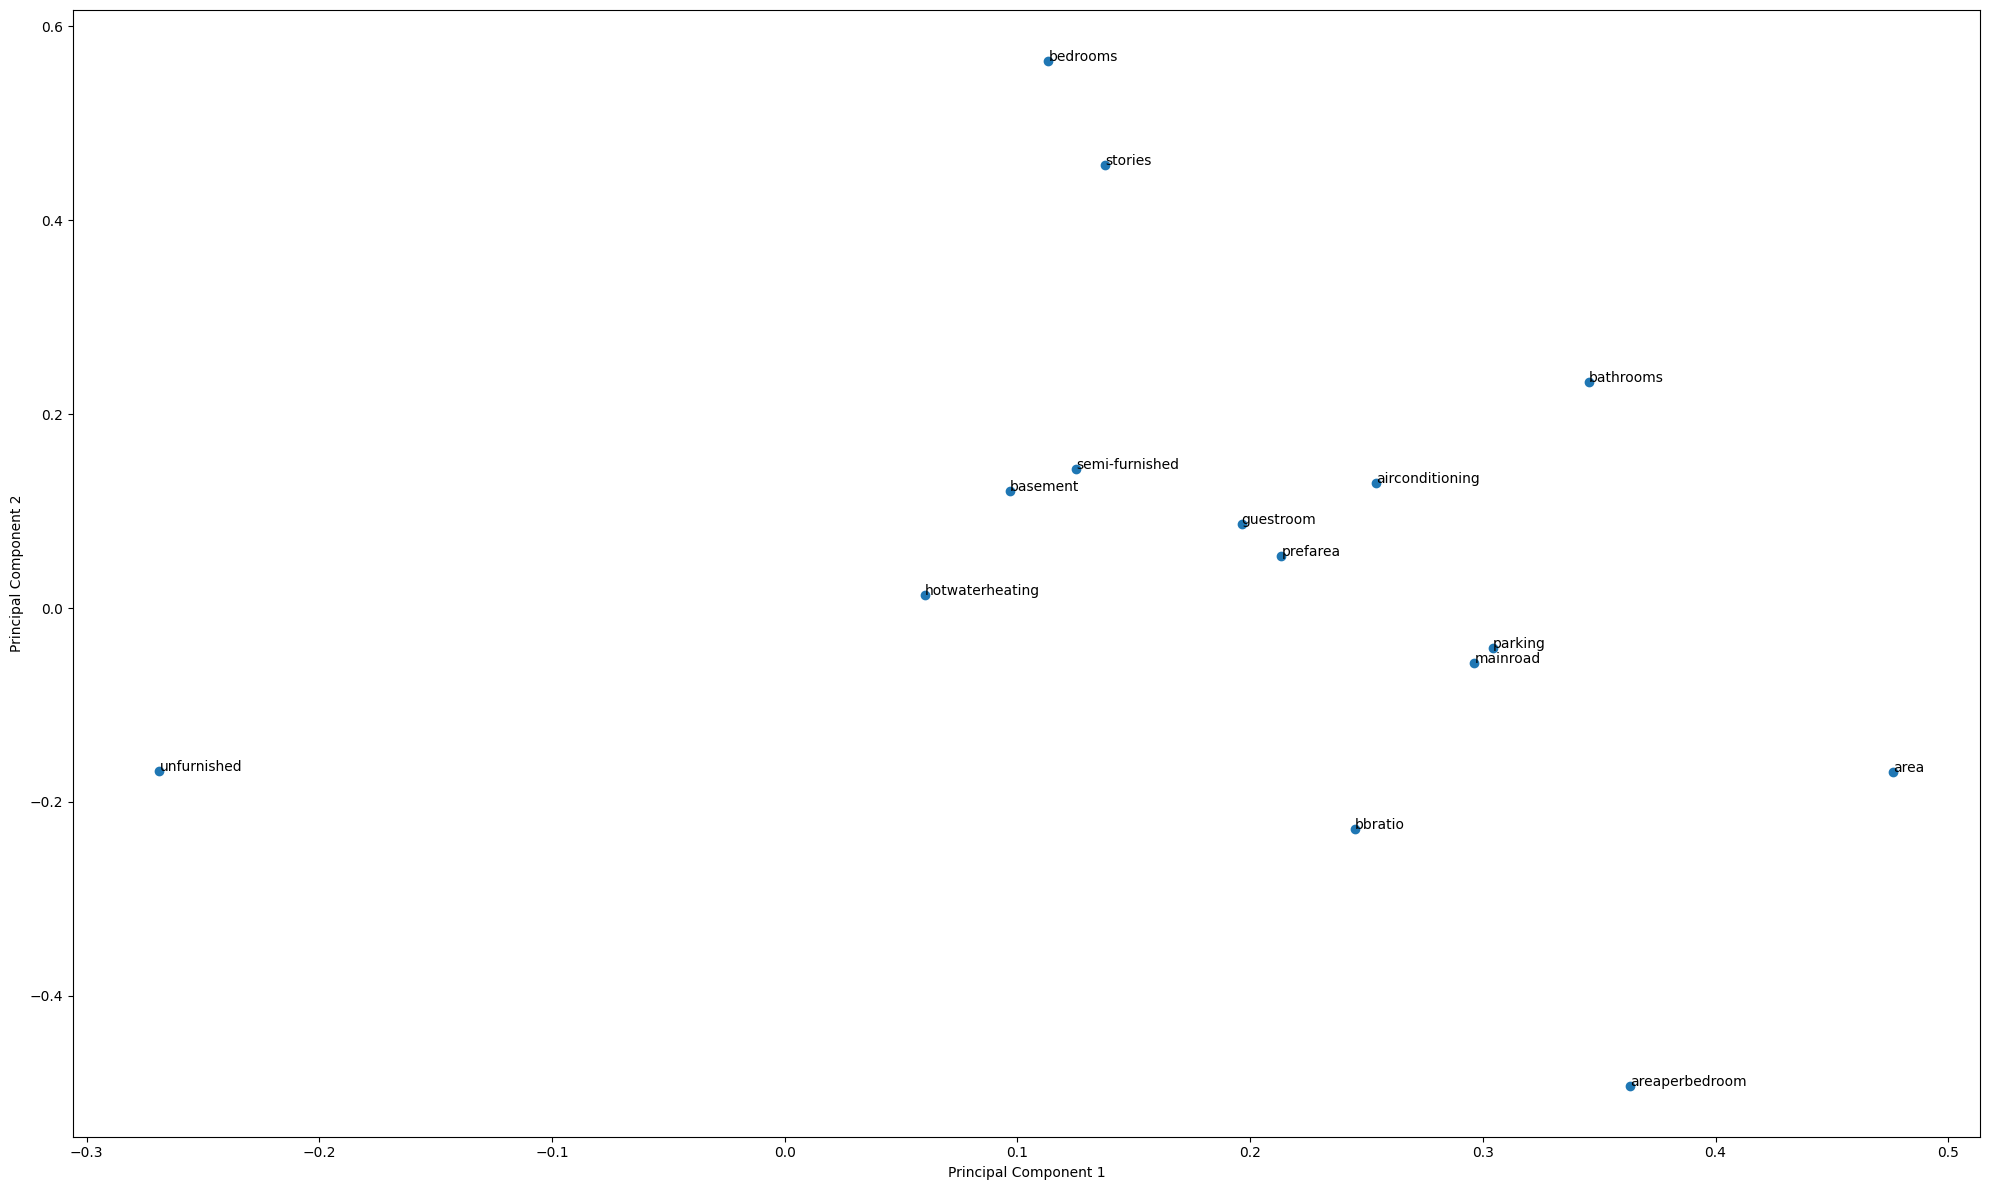

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (20,12))
plt.scatter(components.PC1, components.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(components.Feature):
    plt.annotate(txt, (components.PC1[i],components.PC2[i]))
plt.tight_layout()
plt.show()

In [ ]:
pca_train = pca.transform(Xtrain)
pca_train.shape

(381, 15)

In [ ]:
pca_train

array([[ 4.07650139e-01,  3.76445013e-01, -5.41544721e-01, ...,
         2.45191095e-01,  1.27978921e-04, -1.99123304e-02],
       [ 1.50209846e+00, -1.84984060e+00, -7.25537242e-01, ...,
         3.23926092e-01,  3.61137518e-02,  3.18050728e-02],
       [-1.04677653e+00,  1.19897801e+00, -5.18332847e-01, ...,
        -2.23579918e-01, -1.44309953e-02, -2.05791463e-02],
       ...,
       [-5.84847773e-01,  2.82326922e-01, -1.26929366e-01, ...,
        -1.05919811e+00, -2.17533465e-02, -5.56099421e-02],
       [-1.44969308e+00,  1.53949149e+00,  2.51816563e-01, ...,
        -1.41054093e-01, -9.43696529e-03,  1.18186615e-02],
       [-2.05841036e+00,  1.48483174e+00,  6.57680448e-02, ...,
        -6.41852020e-01,  1.86463772e-03, -3.59698147e-02]])

In [ ]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(pca_train.transpose())
corrmat

array([[ 1.00000000e+00,  1.33795081e-16,  2.73765233e-16,
        -2.31068469e-17, -9.09902329e-17, -3.47060823e-16,
        -3.04162299e-16,  4.27735442e-16,  4.16845212e-16,
         3.66060667e-16, -4.45830620e-16, -4.81931700e-17,
         2.11661792e-16,  2.76754619e-15, -2.62081448e-15],
       [ 1.33795081e-16,  1.00000000e+00, -5.78462467e-16,
         7.64209169e-17, -8.44717439e-16, -5.29170787e-17,
        -5.86804901e-17, -3.39791653e-16,  3.89281365e-16,
         5.03844673e-18,  2.81429337e-16,  2.07084333e-16,
         5.52728678e-16,  2.30705274e-15,  1.15246395e-14],
       [ 2.73765233e-16, -5.78462467e-16,  1.00000000e+00,
         9.59062606e-17,  1.67245014e-15, -3.24427970e-16,
        -3.00816408e-16, -1.22380966e-17, -8.84730359e-16,
         5.69080750e-16,  1.11632158e-15, -2.04574549e-16,
         7.46203172e-16,  1.28201510e-14,  8.53418699e-15],
       [-2.31068469e-17,  7.64209169e-17,  9.59062606e-17,
         1.00000000e+00, -3.36585102e-16, -9.11875442

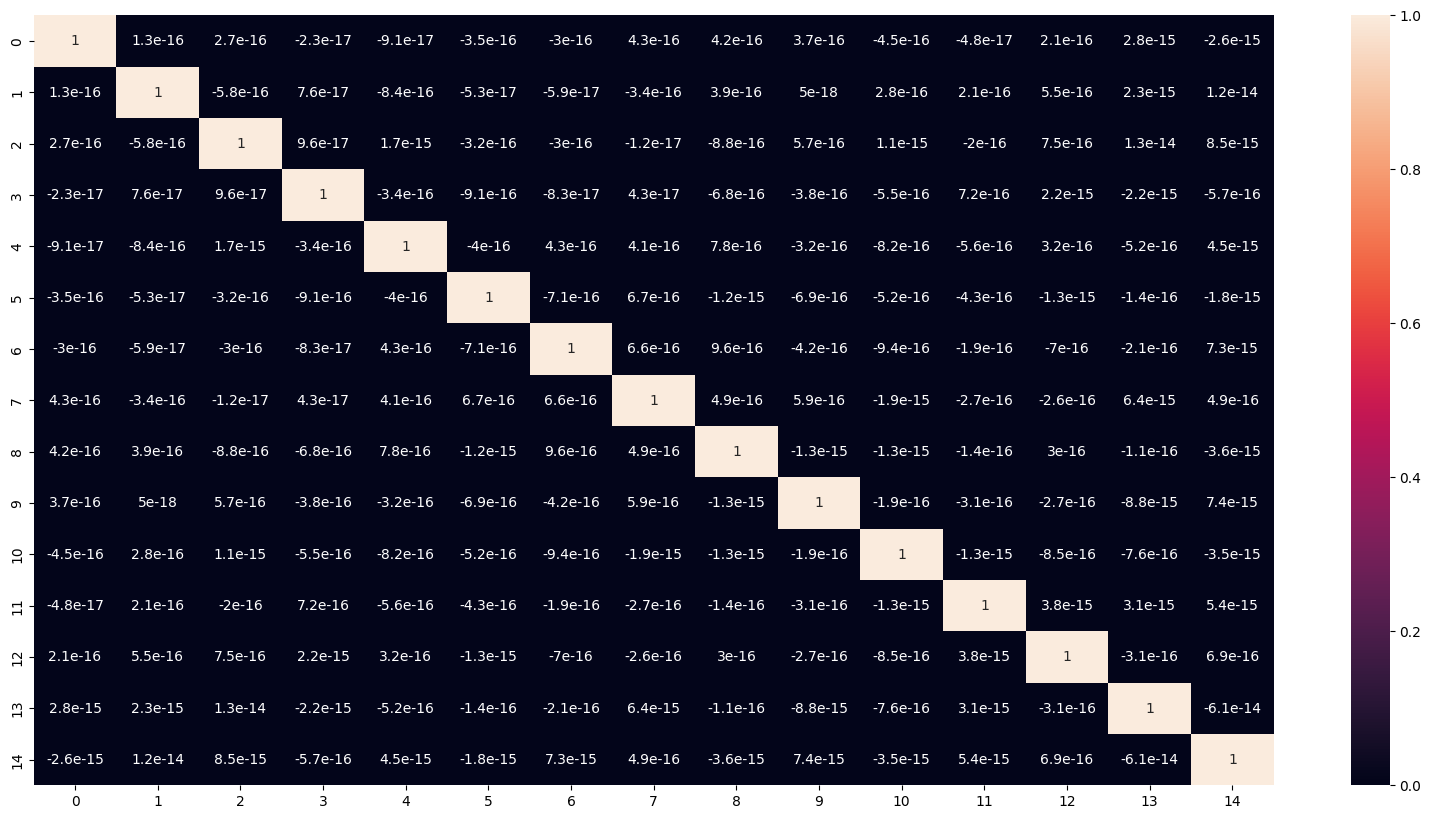

In [ ]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)
plt.show()

In [ ]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.2820150959125853e-14 , min corr:  -6.134383900087727e-14


In [ ]:
#Applying selected components to the test data - 13 components
pca_test = pca.transform(Xtest)
pca_test.shape

(164, 15)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regrpca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca.fit(pca_train, y_train)
# Make predictions using the principal components of the transformed testing set
y_pca_pred = regrpca.predict(pca_test)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pca_pred))

Mean squared error: 0.00


In [ ]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pca_pred))

R2 score: 0.72


In [ ]:
pca = PCA(n_components=10,random_state=42)
#Scale and transform data to get Principal Components

In [ ]:
Xtrain_reduced = pca.fit_transform(Xtrain)
Xtest_reduced = pca.transform(Xtest)
regrpca6 = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca6.fit(Xtrain_reduced, y_train)
# Make predictions using the principal components of the transformed testing set
y_pred = regrpca6.predict(Xtest_reduced)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 0.00


In [ ]:
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

R2 score: 0.72
